<a href="https://colab.research.google.com/github/parulsharma098/Online-Retail-Customer-Segmentation-Capstone-IV/blob/main/Online_Retail_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Project Title : Extraction/identification of major topics & themes discussed in news articles.***


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load the dataset
df=pd.read_csv('/content/drive/MyDrive/Unsupervised capstone project/Online Retail.xlsx - Online Retail.csv')

In [4]:
#checking top 5 rows of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
#checking bottom 5 rows of dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [6]:
#checking shape of dataset
df.shape

(541909, 8)

In [7]:
#basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
#columns of dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
#checking for null values in dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
#dropping null values
df.dropna(inplace=True)

In [11]:
#checking for missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [13]:
#checking shape
df.shape

(406829, 8)

In [14]:
#changing datatype
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [15]:
df=df[~df['InvoiceNo'].str.contains('C')]

In [16]:
df.shape

(397924, 8)

In [17]:
#checking summary
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [18]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
#top 5 Description Name
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


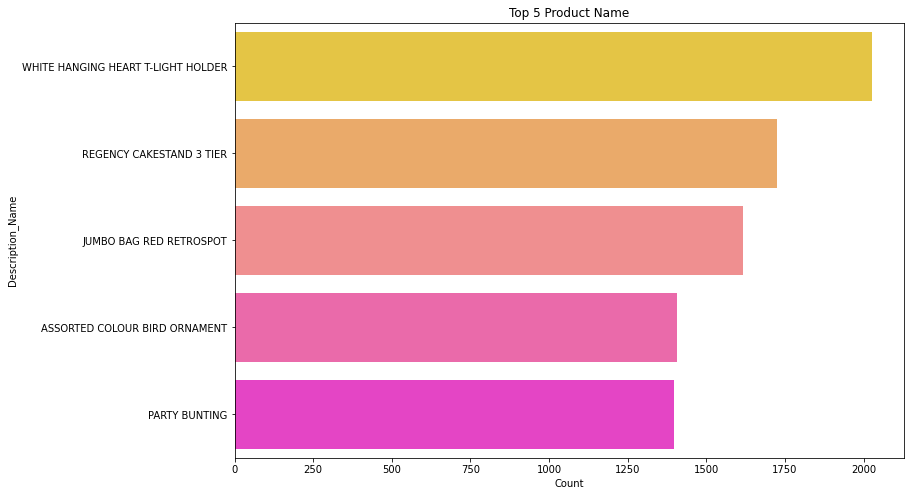

In [19]:
#plot top 5 product name
plt.figure(figsize=(12,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Count',y='Description_Name',data=Description_df[:5], palette='spring_r');

In [20]:
#bottom 5 description name
Description_df.tail()

,Description_Name,Count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


In [21]:
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
#top 5 stockcode name
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


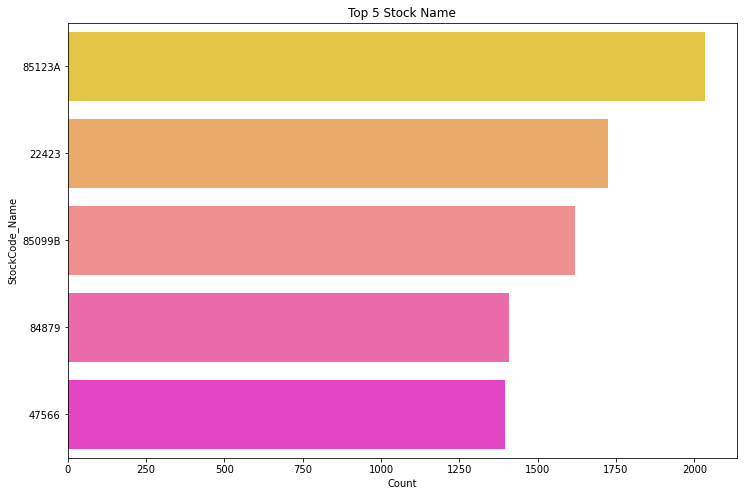

In [22]:
#plot top 5 stockcode name
plt.figure(figsize=(12,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='Count',y='StockCode_Name',data=StockCode_df[:5], palette='spring_r');

In [23]:
#bottom 5 stockcode name
StockCode_df.tail()

,StockCode_Name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


In [24]:
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
#top 5 country name
country_df.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


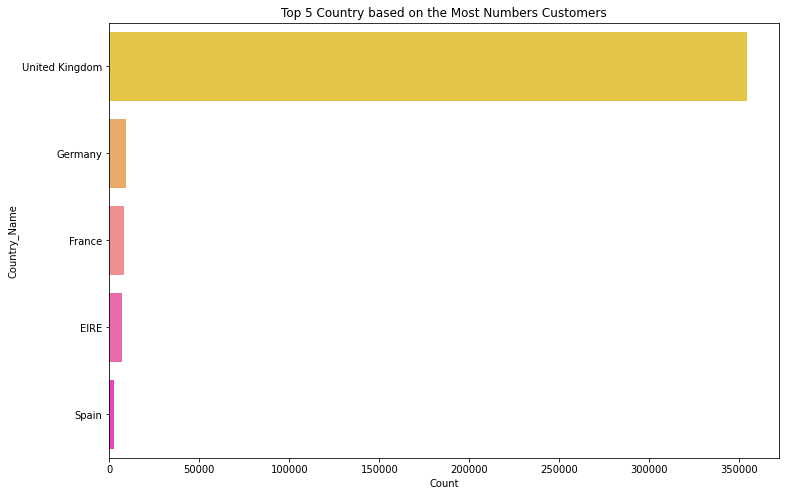

In [25]:
#plot top 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[:5], palette='spring_r');

In [26]:
#bottom 5 country name
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


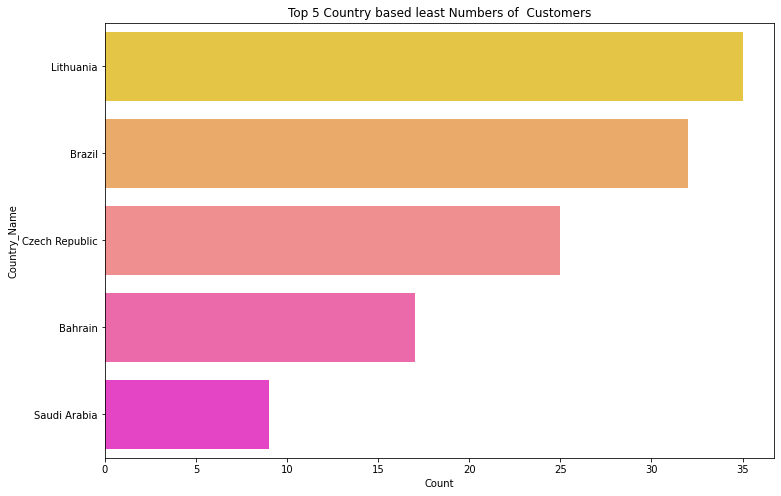

In [27]:
#plot bottom 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Count',y='Country_Name',data=country_df[-5:], palette='spring_r');

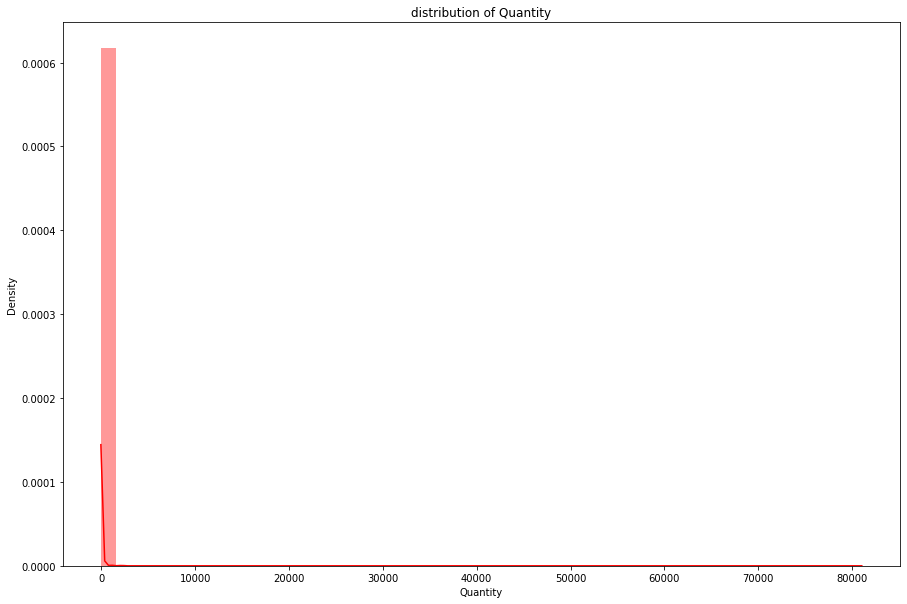

In [28]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="r");

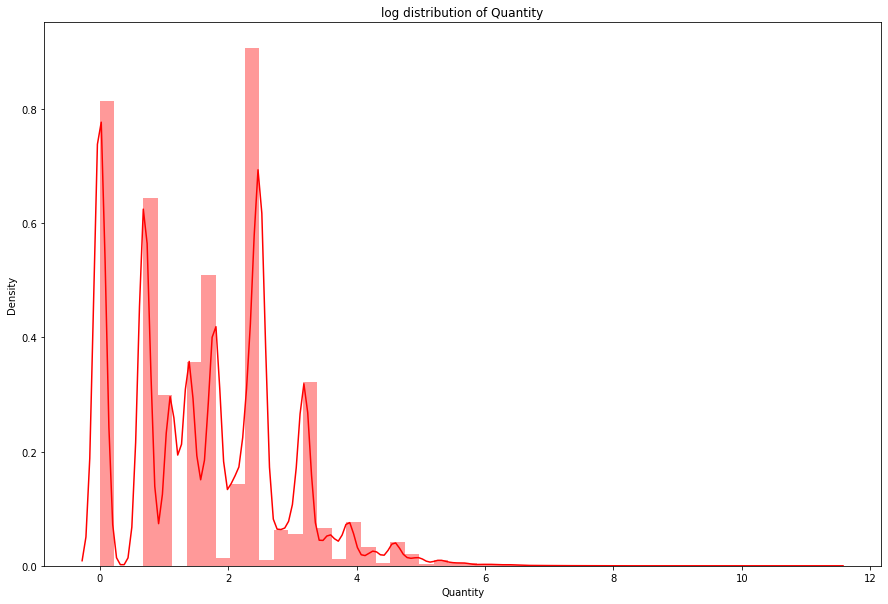

In [29]:
#transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="r");

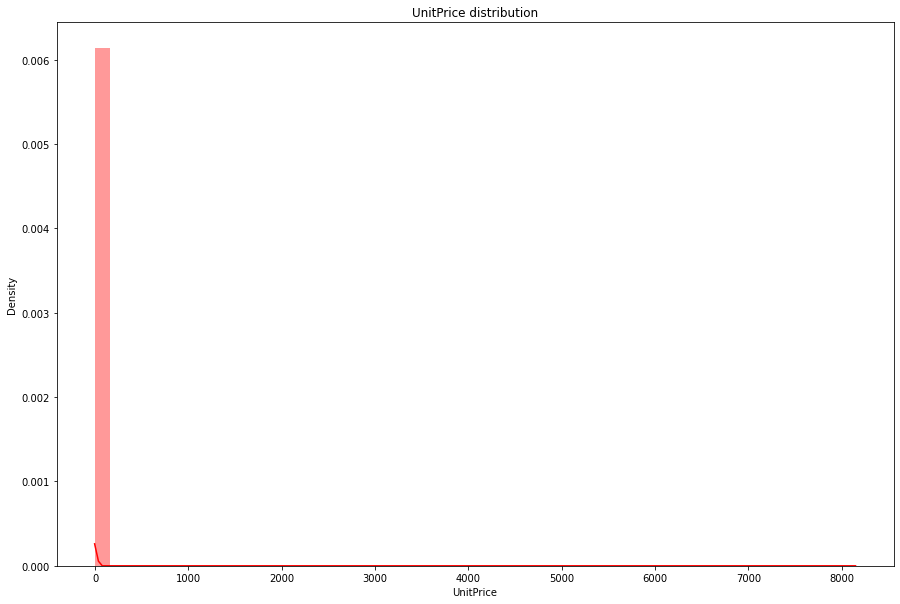

In [30]:
#distribution of unit price
plt.figure(figsize=(15,10))
plt.title('UnitPrice distribution')
sns.distplot(df['UnitPrice'],color="r")

In [31]:
#checking for unit price less than 0
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [32]:
#Converting InvoiceDate columns into date time format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

ValueError: ignored